In [27]:
import argparse as ap
import cv2
import numpy as np
import os
from sklearn.externals import joblib
from scipy.cluster.vq import *

from sklearn import preprocessing
import math
import random

import SinglePass

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

import imagehash

In [2]:
single_pass_cluster = joblib.load('pkl/rumor_spc_all.pkl')
im_features, image_paths, idf, num_words, voc = joblib.load('pkl/rumor_all_im_features.pkl')

In [40]:
im_features.shape

(26295, 1000)

In [41]:
voc.shape

(1000, 128)

In [49]:
def get_a_b(img_1, img_2):
    for path in image_paths:
        if img_1 in path:
            a = image_paths.index(path)
        if img_2 in path:
            b = image_paths.index(path)
    return a, b

In [50]:
def show(a, b):
    plt.subplot(1,2,1)
    plt.imshow(plt.imread(image_paths[a]))
    plt.subplot(1,2,2)
    plt.imshow(plt.imread(image_paths[b]))

    cos = SinglePass.cosine_similarity(im_features[a], im_features[b])
    print(cos)

In [51]:
x = ['4a423125jw1eraqykoksaj20f00qo0ur.jpg', '4aa3ad25jw1era4ok234dj20f20qoab6.jpg', 
     '3bfe8271jw1era46fn9tmj20k00zkjwm', '3e28be33jw1erbbs2eb07j20hs0nq0ua', '4c7eb503jw1era4mex2ajj20hq0vkmzl']

0.767047


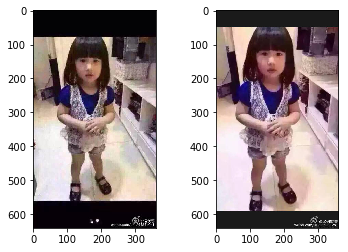

In [52]:
a, b = get_a_b(x[0], x[2])
show(a, b)

In [56]:
from PIL import Image

def similarity_distance(file1, file2, threshold=0.5):
    p_hash1 = imagehash.phash(Image.open(file1))
    p_hash2 = imagehash.phash(Image.open(file2))

    similarity = 1 - (p_hash1 - p_hash2) / len(p_hash1.hash) ** 2
    return similarity

In [75]:
for i in range(len(x)):
    for j in range(i+1, len(x)):
        a, b = get_a_b(x[i], x[j])
        print(similarity_distance(image_paths[a], image_paths[b]))

0.96875
0.84375
0.75
0.84375
0.84375
0.78125
0.875
0.75
0.9375
0.8125


In [58]:
file_hash = imagehash.phash(Image.open(image_paths[a]))

In [60]:
type(file_hash)

imagehash.ImageHash

In [69]:
file_hash

array([[ True,  True,  True,  True, False, False, False, False],
       [False,  True, False, False,  True,  True,  True,  True],
       [False,  True, False, False,  True, False, False,  True],
       [ True,  True,  True,  True, False, False, False,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False,  True, False,  True,  True,  True, False],
       [False, False, False, False,  True,  True,  True, False],
       [ True, False,  True,  True, False,  True, False, False]], dtype=bool)

In [70]:
print(file_hash)

f04f49f10f2e0eb4


In [74]:
# Image.open(image_paths[a])

## 去掉topic图片

In [19]:
rumor_all_dir = '../../pics_filtered_img_rumor'

In [21]:
rumor_all_files = []
for root, dirs, files in os.walk(rumor_all_dir):
    rumor_all_files = files

rumor_all_files = [os.path.join(rumor_all_dir, f) for f in rumor_all_files]

In [25]:
sum = 0
for file in rumor_all_files:
    img = cv2.imread(file)
    shape = img.shape
    if shape[0] == 180 and shape[1] == 180:
        sum += 1

In [26]:
sum

1161

## pHash

In [47]:
import imagehash